In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [211]:
sales = pd.read_excel('/content/RelatorioVendasTotais.xls')

In [227]:
sales.head(10)

,Categoria,Produto,Qtd.Vendida,Valor Médio,Valor de Vendas,Custo Médio,Custo Direto,Lucratividade,Margem de Lucro
0,Encomenda,Encomenda,1,60,60,10,10.00,50.00,83.33
1,Combo,Kit Xonadinho,5,50.6,253,60,300.00,0.00,0.00
2,Combo,Combo milkshake,1,35,35,35,35.00,0.00,0.00
3,Combo,Combo coca,4,27,108,27,108.00,0.00,0.00
4,Combo,Combo mix,6,26,156,26,156.00,0.00,0.00
5,sanduíches,Borogodó,68,20.3,1382.28,14.63,991.42,390.86,27.86
6,sanduíches,Muvuca,13,20,259.96,10.57,137.41,122.55,47.31
7,ROSCAS,Gaiato,11,9.94,109.32,5.16,56.76,52.56,47.45
8,ROSCAS,Nevou,2,9.5,19,3.02,6.04,12.96,68.21
9,recheados,Palozo recheado,7,8.58,60.08,3.39,23.73,36.35,60.38


In [213]:
# Esse bloco de código só foi usado para arrumar as categorias, muitos vieram sem uma nomeação adequada.

mini = [30, 31, 32, 35, 36, 41, 44]
sales.loc[mini, 'Categoria'] = 'Mini'

roscas = [8, 13, 16, 17]
sales.loc[roscas, 'Categoria'] = 'ROSCAS'

sales.loc[1, 'Categoria'] = 'Combo'
sales.loc[0, 'Categoria'] = 'Encomenda'


In [216]:
def categorize(row):
    if 'Combo' in row['Produto']:
        return 'Combo'
    else:
        return row['Categoria']

sales['Categoria'] = sales.apply(categorize, axis=1)


def change(row):
  if 'recheado' in row['Produto']:
    return 'recheados'
  else:
      return row['Categoria']

sales['Categoria'] = sales.apply(change, axis=1)


def change(row):
  if 'Sem categoria' in row['Categoria']:
    return 'Encomenda'
  else:
      return row['Categoria']

sales['Categoria'] = sales.apply(change, axis=1)

In [214]:
passado = sales.loc[75]

In [215]:
sales = sales.drop([77, 75,76, 81, 78, 79, 80, 82, 83, 66, 55])
sales = sales.drop('Sub-Categoria', axis=1)
sales = sales.drop('Vendedor', axis=1)
sales = sales.drop('Subtotal', axis=1)

In [202]:
sales.isna().sum()

Categoria          0
Produto            0
Qtd.Vendida        0
Valor Médio        0
Subtotal           0
Valor de Vendas    0
Custo Médio        0
Custo Direto       0
Lucratividade      0
Margem de Lucro    0
dtype: int64

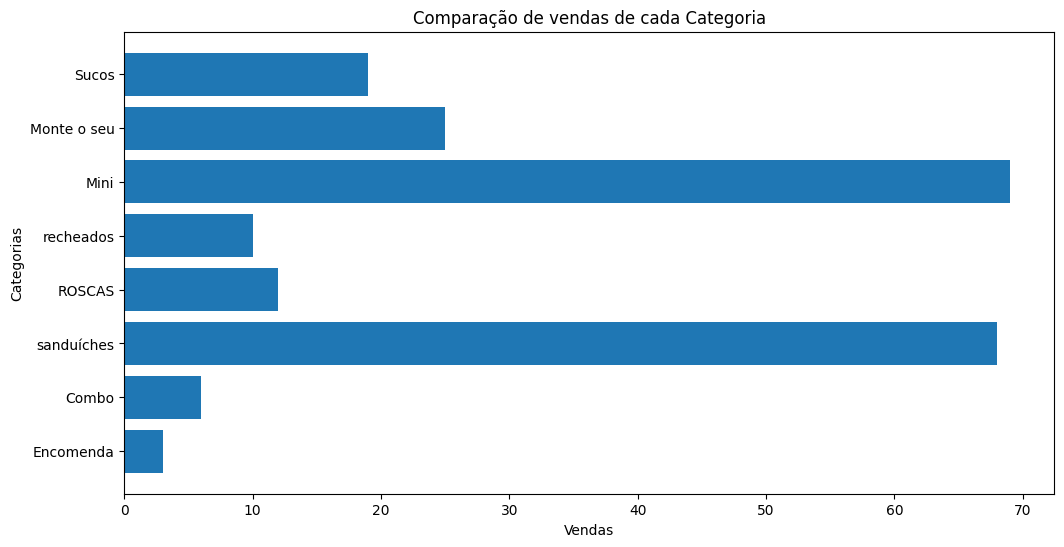

In [217]:
plt.figure(figsize=(12, 6))
plt.barh(sales['Categoria'], sales['Qtd.Vendida'])


plt.xlabel('Vendas')
plt.ylabel('Categorias')
plt.title('Comparação de vendas de cada Categoria')

plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8,) and arg 1 with shape (73,).

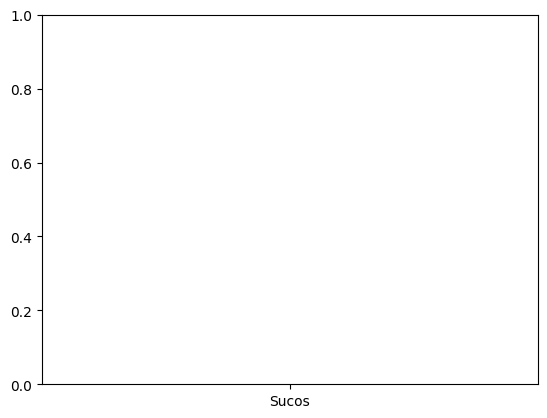

In [225]:
# Incompleto
fig, ax = plt.subplots()
vendas = sales['Categoria']
lucro = sales['Margem de Lucro']
bar_labels = ['Sucos', 'Monte o seu', 'Mini', 'recheados', 'ROSCAS', 'sanduíches', 'Combo', 'Encomenda']

cores = plt.cm.viridis(range(len(vendas)))


ax.bar(bar_labels, lucro, color=cores)

ax.set_ylabel('Margem de Lucro')
ax.set_title('Comparação de Lucros')


plt.show()
